In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
train_house = pd.read_csv("train.csv")
test_house = pd.read_csv("test.csv")

In previous projects I cleaned the two datasets separately, this time I will do it both together


In [3]:
train_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#display(train_house.info())

### 1. Dealing with missing data

For numerical data, I will fill with np.mean()
For object data I will fill with "pad" which propagate the last valid. Then I will pass it to category type ("pad" = "ffill")

For the test_house, I will use a different approach

#### 1.1 Cleaning Train data set

In [5]:
train_house = train_house.fillna({"LotFrontage":np.mean(train_house.LotFrontage)})
assert train_house["LotFrontage"].isna().sum() == 0

In [6]:
#For the Alley, the Nan indicates the absence of it, so it's not a missing value but let's replace it with something different
train_house = train_house.fillna({"Alley":"None"})
assert train_house["Alley"].isna().sum() == 0

In [7]:
train_house["MasVnrType"].fillna(method = "pad",inplace = True)
train_house = train_house.fillna({"MasVnrArea":np.mean(train_house.MasVnrArea)})
assert train_house["MasVnrType"].isna().sum() == 0

In [8]:
cols_to_fill = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
for col in cols_to_fill:
    train_house = train_house.fillna({col:"None"})
    
train_house["Electrical"].fillna(method = "pad", inplace = True)

In [9]:
#The missing vaules in the "FireplaceQu" represents that there is not fire place. 
train_house = train_house.fillna({"FireplaceQu":"None"})
assert train_house["FireplaceQu"].isna().sum() == 0

In [10]:
cols_to_fill_2 = ["GarageType","GarageFinish","GarageQual","GarageCond"]
for cols_2 in cols_to_fill_2:
    train_house = train_house.fillna({cols_2:"None"})
    
#GarageYrBlt is a particular case bc the missing values represent No Garage
train_house = train_house.fillna({"GarageYrBlt":0})

In [11]:
train_house = train_house.fillna({"PoolQC":"None"})
train_house = train_house.fillna({"Fence":"None"})
train_house = train_house.fillna({"MiscFeature":"None"})

In [12]:
#train_house.info() # No missing values

In [13]:
print(train_house.shape)

(1460, 81)


#### 1.2 Cleaning Test data set

In [14]:
test_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [15]:
#test_house.info() #There has to be 1459

In [16]:
test_house["MSZoning"].fillna(method = "pad", inplace = True)

In [17]:
test_house = test_house.fillna({"LotFrontage":np.mean(test_house.LotFrontage)})

In [18]:
#Lets fill all those NaN that are actually not missing values but they are the absences of... 
to_none = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu"
           ,"GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
for _ in to_none:
    test_house = test_house.fillna({_:"None"})
    

In [19]:
test_house = test_house.fillna({"GarageYrBlt":0})

In [20]:
#the reamings one even if they are numerical lets just "ffill" them
test_house.fillna(method = "ffill", inplace = True)

In [21]:
#test_house.info() #No more missing values.

In [22]:
print(test_house.shape)

(1459, 80)


In [23]:
del(train_house["Id"])
del(test_house["Id"])
print(train_house.shape)
print(test_house.shape)

(1460, 80)
(1459, 79)


In [24]:
#I dont like to manipulate the originals dataframes
train_house_copy = train_house.copy()
test_house_copy = test_house.copy()

In [25]:
house_train_du = pd.get_dummies(train_house_copy)

In [26]:
house_set_du = pd.get_dummies(test_house_copy)

### 2. Feature Selection

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [28]:
SEED = 42

In [29]:
y = house_train_du["SalePrice"].values
X = house_train_du.drop("SalePrice",axis = 1).values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

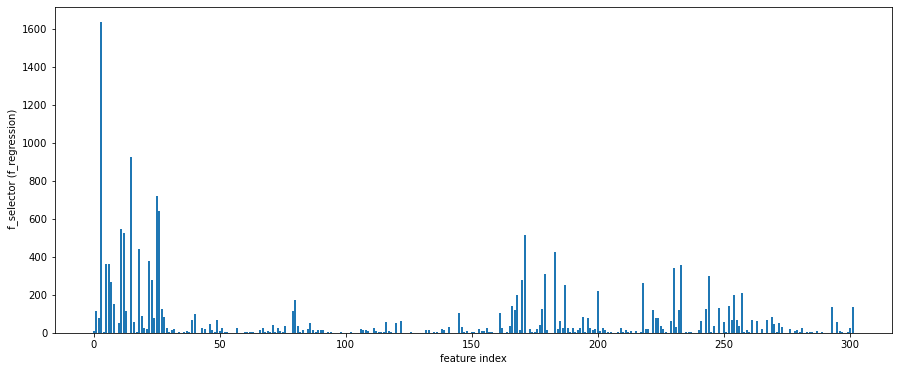

In [33]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

# learn relationship from training data
f_selector.fit(X_train, y_train)

# Plot the scores for the features
plt.figure(figsize=(15,6))
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel(" f_selector (f_regression)")
plt.show()